In [1]:
clf_names = ["CART", "EBM", "GNB", "LR", "LR_l2", "DL"]
dataset_names = ['breast', 'campus', 'churn', 'climate',
            'compas', 'diabetes', 'german', 'heart',
            'adult', 'student', 'bank', 'credit']

In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
def plot_losses(delimiter, loss_df):
    plt.figure(figsize=(13, 10))
    plt.plot(loss_df[:delimiter])
    plt.xlabel("Feature numbers")
    plt.ylabel("Normalized loss")
    plt.legend(loss_df.columns)
    plt.grid(True)
    plt.show()


def NormalizeData(data_avg):
    first = data_avg[0] 
    last = data_avg[data_avg.argmin()]
    return (np.subtract(data_avg, last) / np.subtract(first, last))*100

def calculate_losses(dataset_id):
    features_n = len(pd.read_csv(f"../test_results/feature_density/{clf_names[0]}_{dataset_names[dataset_id]}_{0}.csv"))
    fold_n = 10 
    clf_n = len(clf_names)
    results = np.zeros(shape=(fold_n, features_n))
    norm_results = np.zeros(shape=(clf_n, features_n))

    for clf_id in range(len(clf_names)):
        
        for i in range(fold_n):
            result_df= pd.read_csv(f"../test_results/feature_density/{clf_names[clf_id]}_{dataset_names[dataset_id]}_{i}.csv")
            results[i] = result_df["2"]
        
        result_df = pd.DataFrame(results)
        results_avg = result_df.mean()
        result_normalized = NormalizeData(results_avg)
        norm_results[clf_id] = result_normalized
    
    dict_results = {
        "CART": norm_results[0],
        "EBM": norm_results[1],
        "GNB": norm_results[2],
        "LR": norm_results[3],
        "LR_l2": norm_results[4],
        "DL": norm_results[5]
    }

    return dict_results

from numpy import trapz
def calculate_loss_auc(result_norm_df, delimiter):
    auc_losses = np.zeros(len(clf_names))

    for clf_id, clf in enumerate(clf_names):
        area = trapz(result_norm_df[clf][:delimiter])
        auc_losses[clf_id] = area/delimiter #divide beetwen number of features
    
    dict_auc_losses = {
            "CART": auc_losses[0],
            "EBM": auc_losses[1],
            "GNB": auc_losses[2],
            "LR": auc_losses[3],
            "LR_l2": auc_losses[4],
            "DL": auc_losses[5]
        }
    return dict_auc_losses

    

## 1. Breast Dataset

In [3]:
breast_data_results = calculate_losses(0)
breast_df_results = pd.DataFrame(breast_data_results)

In [4]:
breast_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000
1,42.686359,5.250772e+01,42.838986,53.090229,42.804584,100.000000
2,17.083186,3.217521e+01,19.669002,26.503228,19.027381,6.080975
3,8.563285,1.694865e+01,14.322112,9.354078,11.082785,1.520250
4,3.694807,1.018126e+01,10.725649,4.677021,9.499536,1.013496
5,3.694807,8.489429e+00,5.346891,4.677021,7.916249,0.506754
6,3.673072,3.383671e+00,3.564594,4.677021,6.332999,0.506754
7,2.455960,1.691836e+00,3.564594,1.559007,3.166500,1.013508
8,1.238847,0.000000e+00,3.564594,1.559007,3.166500,0.506754
9,2.434282,0.000000e+00,3.564594,1.559007,3.166500,0.000000


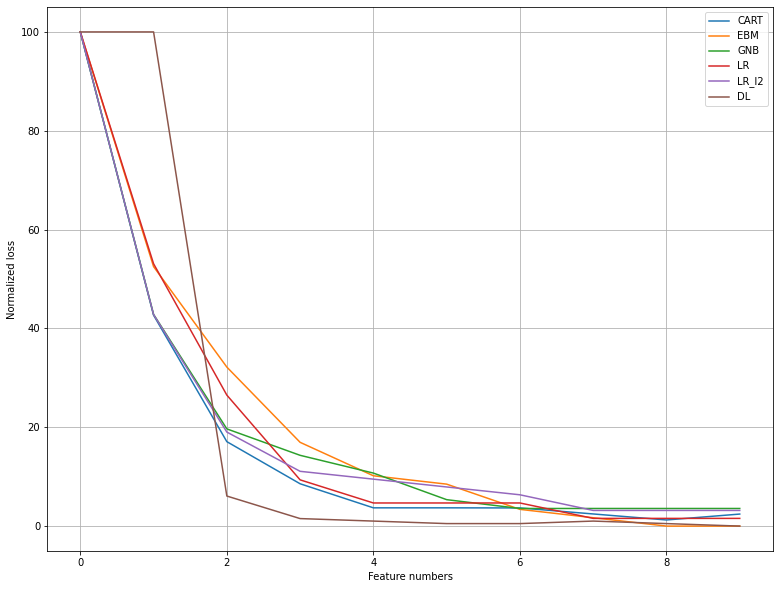

In [5]:
plot_losses(10, breast_df_results)

In [6]:
breast_auc_loss = calculate_loss_auc(breast_df_results, delimiter=10)
breast_auc_loss

{'CART': 13.430746344241342,
 'EBM': 17.53777709141698,
 'GNB': 15.53787181203592,
 'LR': 15.687611619206184,
 'LR_l2': 15.457978374480984,
 'DL': 16.11484897353979}

## 2. Campus Dataset

In [7]:
campus_data_results = calculate_losses(1)
campus_df_results = pd.DataFrame(campus_data_results)
campus_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,32.895678,33.859564,24.668786,27.007085,28.532880,100.000000
2,4.439984,16.929719,14.155608,11.496290,15.205657,90.322603
3,0.000000,7.543939,10.595960,5.748167,11.359510,20.737279
4,8.778816,5.701836,3.642264,3.740917,11.448910,11.059882
5,13.117794,1.929954,3.559607,1.824906,9.481159,0.460594
6,2.421881,3.772014,0.000000,3.740917,5.545610,0.460594
7,0.201965,1.842192,5.380635,1.824817,5.635099,0.460828
8,2.220066,0.000000,8.691863,0.000000,0.000000,0.000000
9,8.678107,7.543764,7.036230,7.846479,3.846060,0.000000


In [8]:
campus_df_results[campus_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0,NaN,0.0,0.0,0.0
9,NaN,NaN,NaN,NaN,NaN,0.0


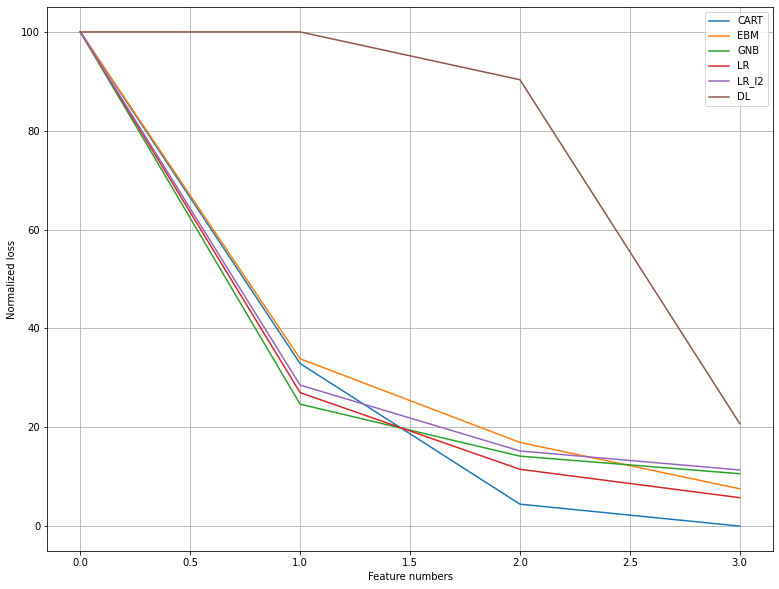

In [9]:
plot_losses(4, campus_df_results)

In [10]:
campus_auc_loss = calculate_loss_auc(campus_df_results, delimiter=4)
campus_auc_loss

{'CART': 21.833915685384092,
 'EBM': 26.14031307294057,
 'GNB': 23.530593419396805,
 'LR': 22.84436487631805,
 'LR_l2': 24.85457292557233,
 'DL': 62.67281065431724}

## 3. Churn Dataset

In [11]:
churn_data_results = calculate_losses(2)
churn_df_results = pd.DataFrame(churn_data_results)
churn_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,59.936231,68.220315,25.947968,100.000000,100.000000,100.000000
2,30.366484,39.266303,25.314983,100.000000,100.000000,46.780472
3,7.631212,16.808037,24.365572,97.841916,97.857333,37.769723
4,0.000000,9.604661,23.732580,81.294614,81.428241,16.308716
5,10.016191,4.237407,23.099610,39.567757,39.285127,16.308716
6,32.433312,0.000000,26.897145,17.984737,19.284945,17.381695
7,78.540341,0.141270,28.163034,3.596301,3.570660,17.811299
8,89.510663,1.271272,37.658832,0.000000,0.000000,16.308820
9,86.489885,2.542485,0.000000,9.353584,11.429779,10.729383


In [12]:
churn_df_results[churn_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,0.0,0.0,NaN
9,NaN,NaN,0.0,NaN,NaN,NaN


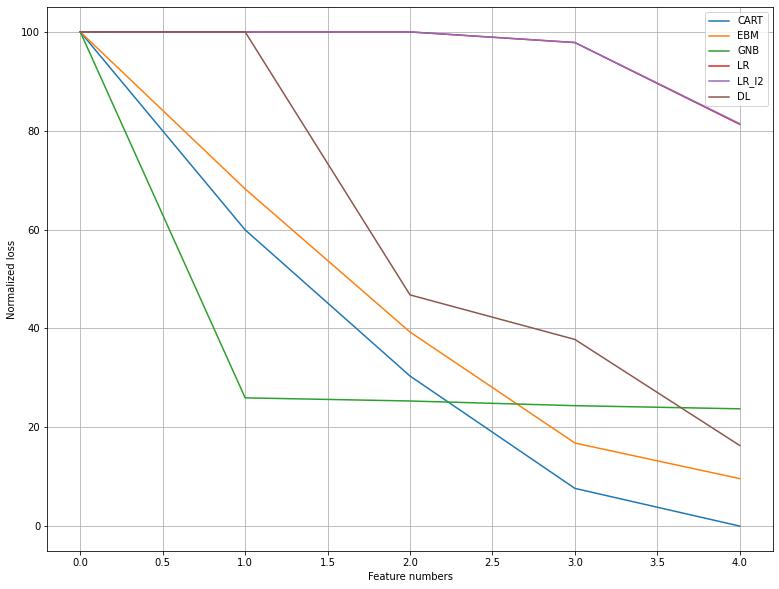

In [13]:
plot_losses(5, churn_df_results)

In [14]:
churn_auc_loss = calculate_loss_auc(churn_df_results, delimiter=5)
churn_auc_loss

{'CART': 29.58678545198983,
 'EBM': 35.81939719188187,
 'GNB': 27.498962589129935,
 'LR': 77.69784461442035,
 'LR_l2': 77.71429067532583,
 'DL': 48.54091042214337}

## 4. Climate dataset

In [15]:
climate_data_results = calculate_losses(3)
climate_df_results = pd.DataFrame(climate_data_results)
climate_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,41.666948,100.000000,100.000000,100.000000,100.000000,100.000000
2,27.083432,59.259088,58.620370,57.575607,57.575617,66.666667
3,29.166598,25.925926,27.586127,33.333427,42.424172,0.000000
4,10.416653,18.518433,17.241379,30.303058,27.272727,0.000000
5,0.000000,14.814729,6.896552,15.151634,21.212121,0.000000
6,4.166671,3.703618,3.448276,12.121335,15.151515,0.000000
7,10.416653,0.000000,3.448276,15.151494,12.121212,0.000000
8,4.166526,7.407322,3.448276,9.090966,12.121212,0.000000
9,6.249885,7.407322,3.448276,6.060598,9.090909,0.000000


In [16]:
climate_df_results[climate_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0
5,0.0,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,0.0
7,NaN,0.0,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,0.0
9,NaN,NaN,NaN,NaN,NaN,0.0


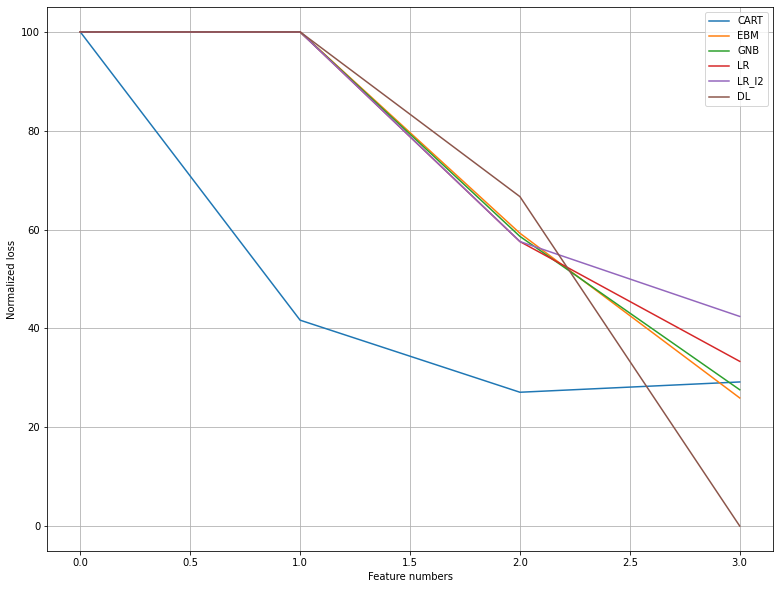

In [17]:
plot_losses(4, climate_df_results)

In [18]:
climate_auc_loss = calculate_loss_auc(climate_df_results, delimiter=4)
climate_auc_loss

{'CART': 33.333419745682164,
 'EBM': 55.55551268485029,
 'GNB': 55.603358469126064,
 'LR': 56.06058001934643,
 'LR_l2': 57.19692585193024,
 'DL': 54.16666666666663}

## 5.Compas dataset

In [19]:
compas_data_results = calculate_losses(4)
compas_df_results = pd.DataFrame(compas_data_results)
compas_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,97.531046,100.000000,90.011433,100.000000,100.000000,100.000000
2,81.487443,100.000000,46.680473,100.000000,100.000000,94.804089
3,21.605239,43.114562,0.000000,74.199301,74.199301,38.318375
4,11.111336,23.742582,3.338825,36.285845,36.285845,20.133389
5,6.789702,11.868675,20.006888,28.219197,28.219197,19.484046
6,0.000000,0.622954,15.005273,20.959622,20.959622,9.093784
7,8.645707,0.618993,43.381320,19.346110,19.346110,5.196317
8,18.522923,0.000000,91.684249,4.028167,4.028167,3.246908
9,23.468298,8.745888,93.372762,0.000000,0.000000,0.000000


In [20]:
compas_df_results[compas_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.0,0.0,0.0


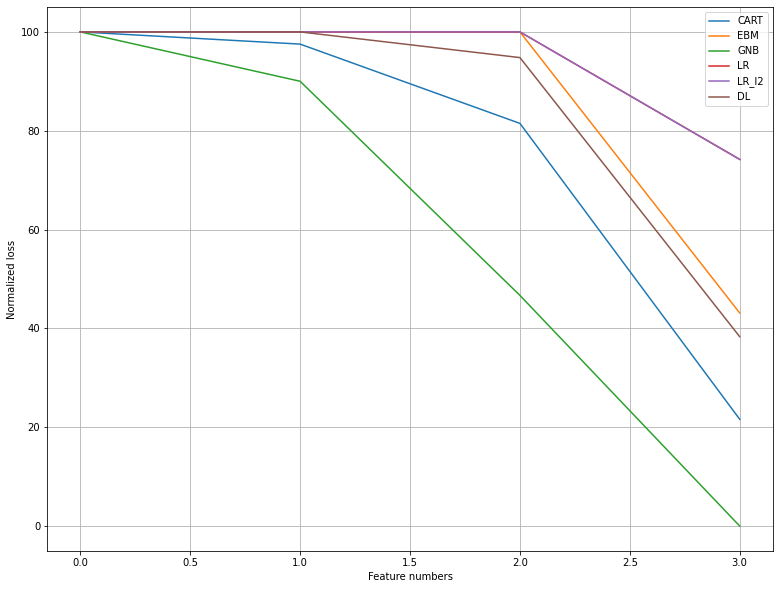

In [21]:
plot_losses(4, compas_df_results)

In [22]:
compas_auc_loss = calculate_loss_auc(compas_df_results, delimiter=4)
compas_auc_loss

{'CART': 59.95527698342742,
 'EBM': 67.88932023534991,
 'GNB': 46.67297665436293,
 'LR': 71.77491262125389,
 'LR_l2': 71.77491262125389,
 'DL': 65.9908191224209}

## 6. Diabetes dataset

In [23]:
diabetes_data_results = calculate_losses(5)
diabetes_df_results = pd.DataFrame(diabetes_data_results)
diabetes_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,50.708130,31.658635,32.025865,33.701839,33.711007,100.000000
2,44.091483,7.891846,12.568265,8.380540,9.469947,35.326384
3,42.544558,0.960375,3.832884,0.000000,0.000000,9.182067
4,40.847678,2.959508,0.929513,0.000000,1.062950,0.000000
5,6.575036,0.000000,0.000000,1.035557,0.000049,12.461221
6,0.000000,7.905078,0.942382,6.282081,5.245875,11.313557
7,21.466178,10.903596,11.651890,3.120428,3.133852,14.712091
8,85.154941,30.698627,27.162200,9.457784,7.371947,20.406345


In [24]:
diabetes_df_results[diabetes_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.0,NaN
4,NaN,NaN,NaN,0.0,NaN,0.0
5,NaN,0.0,0.0,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN


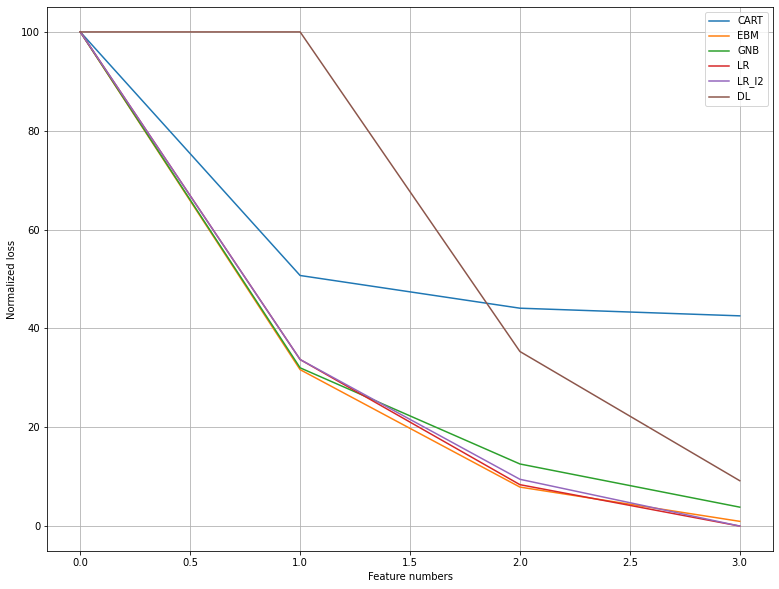

In [25]:
plot_losses(4, diabetes_df_results)

In [26]:
diabetes_auc_loss = calculate_loss_auc(diabetes_df_results, delimiter=4)
diabetes_auc_loss

{'CART': 41.51797304363918,
 'EBM': 22.50766730270872,
 'GNB': 24.127643038190914,
 'LR': 23.02059468025416,
 'LR_l2': 23.295238497053944,
 'DL': 47.47935432224915}

## 7. German dataset

In [27]:
german_data_results = calculate_losses(6)
german_df_results = pd.DataFrame(german_data_results)
german_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,39.769530,79.299889,79.299889,61.274449,65.069790,50.100344
2,17.943720,53.181748,53.181748,45.767821,47.994021,30.140297
3,8.946654,36.936207,36.936207,34.916516,39.862363,0.000000
4,6.396125,22.518339,22.518339,18.643630,30.105874,0.000000
5,8.971296,12.618405,12.618405,10.867132,17.887958,19.959816
6,8.971029,10.818358,10.818358,8.527843,10.560434,19.959816
7,0.000000,9.009199,9.009199,3.880703,5.686434,29.939609
8,8.957195,9.018186,9.018186,2.331609,0.812358,39.919632
9,2.523987,6.318314,6.318314,3.106013,0.000000,59.879218


In [28]:
german_df_results[german_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,0.0,NaN


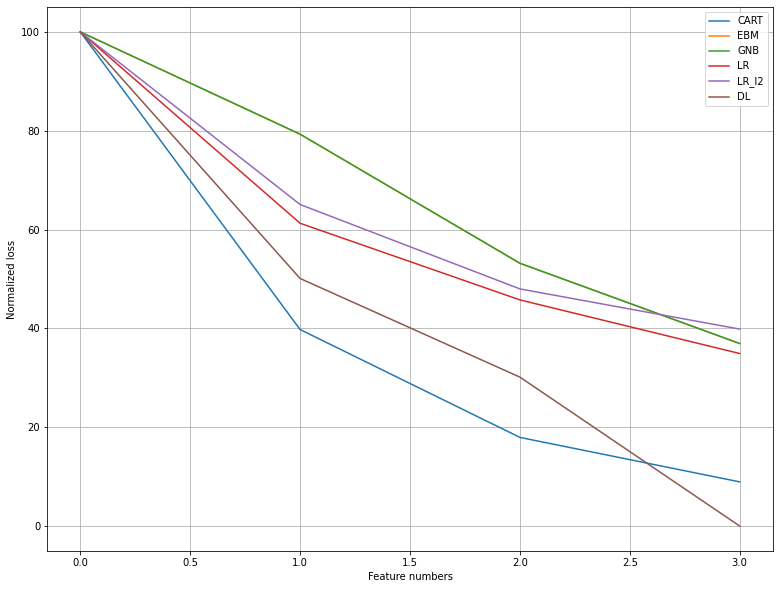

In [29]:
plot_losses(4, german_df_results)

In [30]:
german_auc_loss = calculate_loss_auc(german_df_results, delimiter=4)
german_auc_loss

{'CART': 28.046644339792593,
 'EBM': 50.23743528423608,
 'GNB': 50.23743528423608,
 'LR': 43.62513186186356,
 'LR_l2': 45.748748258395906,
 'DL': 32.56016014388656}

### 8. Heart dataset

In [31]:
heart_data_results = calculate_losses(7)
heart_df_results = pd.DataFrame(heart_data_results)
heart_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,18.697326,29.238326,29.238326,33.688039,33.381137,20.708388
2,8.900188,16.816466,16.816466,18.209364,17.611188,8.641131
3,0.807607,11.523387,11.523387,11.845106,11.127168,4.320556
4,2.422463,7.070371,7.070371,5.480868,3.702288,0.000000
5,3.229844,3.554686,3.554686,2.730354,2.781798,0.856561
6,0.000000,0.000000,0.000000,2.710277,1.840918,3.426086
7,8.056658,2.636743,2.636743,0.000000,0.000000,2.569585
8,8.074770,6.171897,6.171897,0.943579,1.881782,7.765756
9,12.955452,9.707073,9.707073,6.384230,4.643104,12.067298


In [32]:
heart_df_results[heart_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,NaN,NaN,NaN
7,NaN,NaN,NaN,0.0,0.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


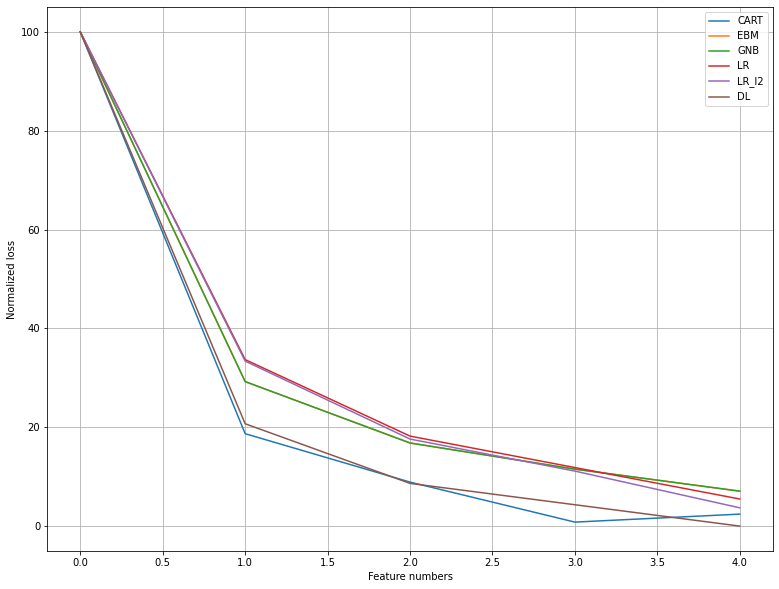

In [33]:
plot_losses(5, heart_df_results)

In [34]:
heart_auc_loss = calculate_loss_auc(heart_df_results, delimiter=7)
heart_auc_loss

{'CART': 12.00820396408736,
 'EBM': 16.886176571111285,
 'GNB': 16.886176571111285,
 'LR': 17.615552770643088,
 'LR_l2': 17.074862572249632,
 'DL': 12.319954113362911}

### 9. Adult dataset

In [35]:
adult_data_results = calculate_losses(8)
adult_df_results = pd.DataFrame(adult_data_results)
adult_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,50.817090,56.643817,54.158747,50.598333,50.284881,83.054520
2,30.180722,38.979359,46.706655,38.533585,38.434830,43.331126
3,25.423154,33.905592,34.661611,34.797255,34.694210,21.865879
4,2.497708,12.026847,7.625726,21.904987,23.671702,6.596533
5,0.446011,7.838857,4.852929,18.425040,21.187241,2.769729
6,0.000000,4.268399,0.000000,6.189310,7.595614,2.150117
7,0.505489,2.389151,4.982833,3.707864,4.425970,2.150117
8,1.486838,1.530077,63.262640,2.196153,2.255791,2.150117
9,3.360276,1.181135,97.840003,1.340509,1.142169,2.150117


In [36]:
adult_df_results[adult_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,0.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


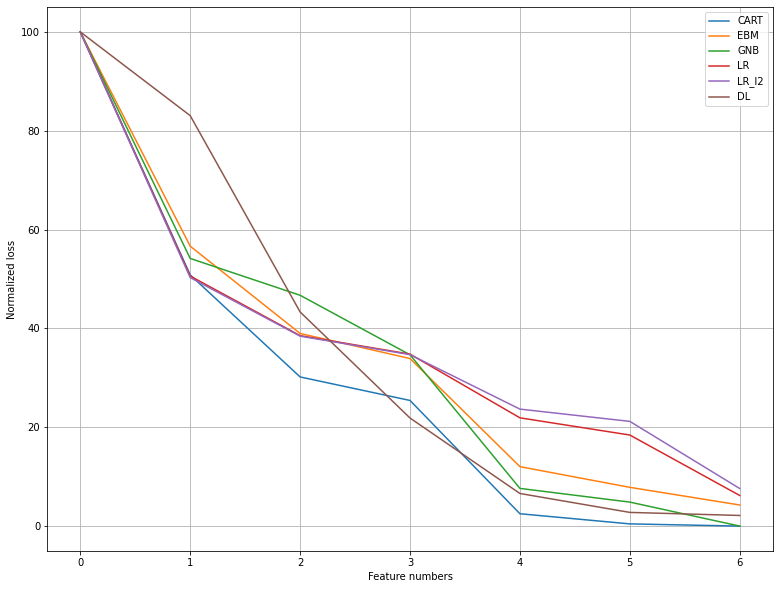

In [37]:
plot_losses(7, adult_df_results)

In [38]:
adult_auc_loss = calculate_loss_auc(adult_df_results, delimiter=7)
adult_auc_loss

{'CART': 22.766383613081562,
 'EBM': 28.78981036244576,
 'GNB': 28.286524013416162,
 'LR': 31.05055051788821,
 'LR_l2': 31.724381605310164,
 'DL': 29.813263595679096}

### 10. Student dataset

In [39]:
student_data_results = calculate_losses(9)
student_df_results = pd.DataFrame(student_data_results)
student_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,49.073350,48.539545,41.957279,43.008777,45.228484,93.788645
2,34.271432,35.167426,22.573495,24.974375,26.922858,47.049272
3,21.275912,24.692293,12.895284,12.006025,13.510213,24.689349
4,14.825075,14.216916,6.434048,7.978657,10.637759,12.370579
5,12.010177,16.171920,5.370704,4.964481,8.739077,10.300190
6,12.924807,13.323803,0.000000,0.937228,5.793684,8.281653
7,3.682850,16.171811,2.208228,0.962580,3.821908,2.070389
8,0.000000,14.240789,0.027311,0.937182,2.872567,0.000000
9,3.682806,7.554937,1.090607,0.000000,4.819889,6.107649


In [40]:
student_df_results[student_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,NaN,NaN,NaN,NaN,0.0
9,NaN,NaN,NaN,0.0,NaN,NaN


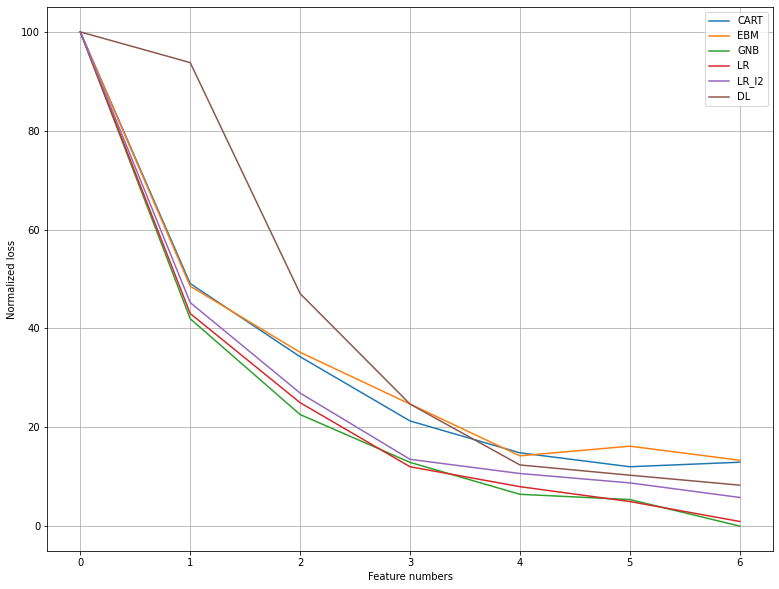

In [41]:
plot_losses(7, student_df_results)

In [42]:
student_auc_loss = calculate_loss_auc(student_df_results, delimiter=7)
student_auc_loss

{'CART': 26.845478555298694,
 'EBM': 27.921428836475133,
 'GNB': 19.89011563582002,
 'LR': 20.485846894804315,
 'LR_l2': 22.562175987324757,
 'DL': 34.619837402880286}

### 11. Bank dataset

In [43]:
bank_data_results = calculate_losses(10)
bank_df_results = pd.DataFrame(bank_data_results)
bank_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,9.515541,76.073123,35.312678,50.680781,50.988703,45.129118
2,4.104961,32.161773,5.367816,18.639098,18.938957,1.972898
3,0.559864,22.984903,0.000000,9.529048,10.614187,0.000000
4,0.000000,17.152980,1.695430,5.235633,6.035424,0.000000
5,3.358294,13.550891,10.453746,1.884820,2.705512,0.000000
6,7.089832,8.319218,31.360297,0.000000,0.936542,0.000000
7,20.896309,5.403286,57.634384,0.837747,0.728447,0.000000
8,47.576022,4.288435,68.369204,0.314164,0.000000,0.000000
9,86.010971,1.200842,79.668715,1.361366,1.873127,0.000000


In [44]:
bank_df_results[bank_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.0,NaN,NaN,0.0
4,0.0,NaN,NaN,NaN,NaN,0.0
5,NaN,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,0.0,NaN,0.0
7,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,0.0,0.0
9,NaN,NaN,NaN,NaN,NaN,0.0


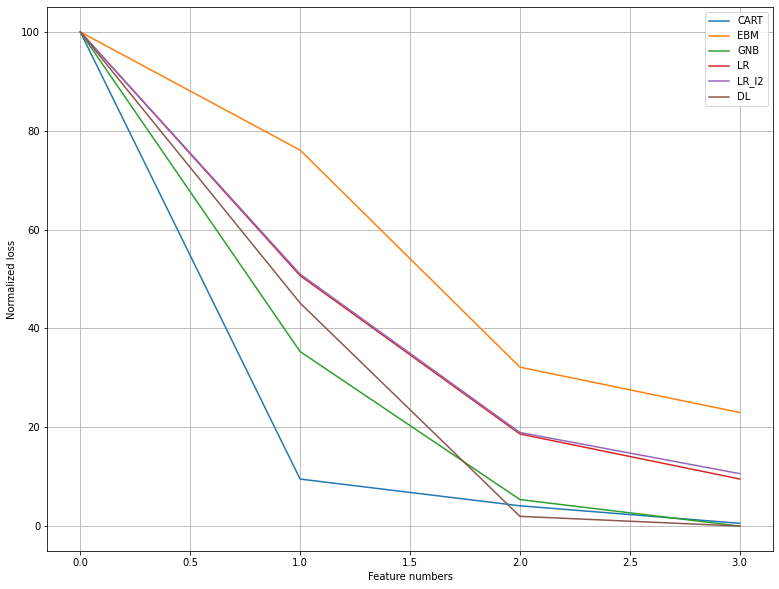

In [45]:
plot_losses(4, bank_df_results)

In [46]:
bank_auc_loss = calculate_loss_auc(bank_df_results, delimiter=4)
bank_auc_loss

{'CART': 15.975108680151243,
 'EBM': 42.43183704051181,
 'GNB': 22.6701234347225,
 'LR': 31.02110064916332,
 'LR_l2': 31.308688422843233,
 'DL': 24.275504044274374}

### 12. Credit dataset

In [47]:
credit_data_results = calculate_losses(11)
credit_df_results = pd.DataFrame(credit_data_results)
credit_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,10.382983,12.260147,5.017308,7.593040,7.991554,1.732406
2,7.783948,10.139717,2.930452,4.913187,6.212691,0.866208
3,5.624664,10.139717,1.255963,4.466535,5.767964,0.433089
4,4.751656,10.139727,1.255963,3.573230,5.323248,0.000000
5,0.420031,8.443342,1.255963,2.679925,4.433796,0.000000
6,0.000000,5.057017,1.255963,0.893315,3.099617,0.000000
7,2.152641,2.949409,1.255915,0.893305,2.210165,0.000000
8,3.032113,2.107628,0.830911,0.446642,0.444737,0.000000
9,6.490870,0.417688,0.000000,0.000000,0.444737,0.433109


In [48]:
credit_df_results[credit_df_results == 0]

,CART,EBM,GNB,LR,LR_l2,DL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.0
5,NaN,NaN,NaN,NaN,NaN,0.0
6,0.0,NaN,NaN,NaN,NaN,0.0
7,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,0.0
9,NaN,NaN,0.0,0.0,NaN,NaN


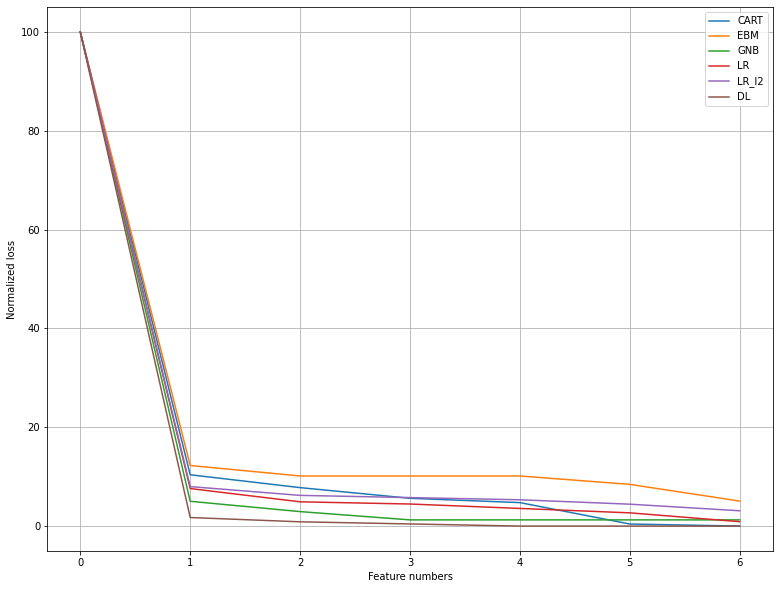

In [49]:
plot_losses(7, credit_df_results)

In [50]:
credit_auc_loss = calculate_loss_auc(credit_df_results, delimiter=7)
credit_auc_loss

{'CART': 11.280468904578784,
 'EBM': 14.807308566602249,
 'GNB': 8.906233045407385,
 'LR': 10.524653344977688,
 'LR_l2': 11.611294615973877,
 'DL': 7.575957646775014}

## Final Results

In [51]:
list_fin = [breast_auc_loss, campus_auc_loss, churn_auc_loss,
            climate_auc_loss, compas_auc_loss, diabetes_auc_loss,
            german_auc_loss, heart_auc_loss, adult_auc_loss,
            student_auc_loss, bank_auc_loss, credit_auc_loss]

In [52]:
fin_res_df = pd.DataFrame(list_fin)
fin_res_df

,CART,EBM,GNB,LR,LR_l2,DL
0,13.430746,17.537777,15.537872,15.687612,15.457978,16.114849
1,21.833916,26.140313,23.530593,22.844365,24.854573,62.672811
2,29.586785,35.819397,27.498963,77.697845,77.714291,48.540910
3,33.333420,55.555513,55.603358,56.060580,57.196926,54.166667
4,59.955277,67.889320,46.672977,71.774913,71.774913,65.990819
5,41.517973,22.507667,24.127643,23.020595,23.295238,47.479354
6,28.046644,50.237435,50.237435,43.625132,45.748748,32.560160
7,12.008204,16.886177,16.886177,17.615553,17.074863,12.319954
8,22.766384,28.789810,28.286524,31.050551,31.724382,29.813264
9,26.845479,27.921429,19.890116,20.485847,22.562176,34.619837


In [53]:
fin_res_df.mean()

CART     26.381700
EBM      33.876999
GNB      28.320668
LR       35.117395
LR_l2    35.860339
DL       36.344174
dtype: float64

In [54]:
clfs = ["CART", "EBM", "GNB","LR", "LR_l2", "DL"]

In [61]:
from scipy.stats import rankdata

def wilcoxon_test(mean_results):
    # mean_results = np.mean(results, axis=2).T
    print("\nMean results:\n", mean_results)

    ranks = []
    for mr in mean_results:
        ranks.append(rankdata(mr).tolist())
    ranks = np.array(ranks)
    print("\nRanks:\n", ranks)

    mean_ranks = np.mean(ranks, axis=0)
    print(mean_ranks)

    from scipy.stats import ranksums

    alfa = .05
    w_statistic = np.zeros((len(clfs), len(clfs)))
    p_value = np.zeros((len(clfs), len(clfs)))

    for i in range(len(clfs)):
        for j in range(len(clfs)):
            w_statistic[i, j], p_value[i, j] = ranksums(ranks.T[i], ranks.T[j])
    
    from tabulate import tabulate

    headers = clfs
    names_column = np.expand_dims((np.array(clfs)), axis=1)
    w_statistic_table = np.concatenate((names_column, w_statistic), axis=1)
    w_statistic_table = tabulate(w_statistic_table, headers, floatfmt=".2f")
    p_value_table = np.concatenate((names_column, p_value), axis=1)
    p_value_table = tabulate(p_value_table, headers, floatfmt=".2f")
    print("\nw-statistic:\n", w_statistic_table, "\n\np-value:\n", p_value_table)
    
    advantage = np.zeros((len(clfs), len(clfs)))
    advantage[w_statistic > 0] = 1
    advantage_table = tabulate(np.concatenate(
        (names_column, advantage), axis=1), headers)
    print("\nAdvantage:\n", advantage_table)

    significance = np.zeros((len(clfs), len(clfs)))
    significance[p_value <= alfa] = 1
    significance_table = tabulate(np.concatenate(
        (names_column, significance), axis=1), headers)
    print("\nStatistical significance (alpha = 0.05):\n", significance_table)

    stat_better = significance * advantage
    stat_better_table = tabulate(np.concatenate(
        (names_column, stat_better), axis=1), headers)
    print("Statistically significantly better:\n", stat_better_table)

In [59]:
fin_res_df

,CART,EBM,GNB,LR,LR_l2,DL
0,13.430746,17.537777,15.537872,15.687612,15.457978,16.114849
1,21.833916,26.140313,23.530593,22.844365,24.854573,62.672811
2,29.586785,35.819397,27.498963,77.697845,77.714291,48.540910
3,33.333420,55.555513,55.603358,56.060580,57.196926,54.166667
4,59.955277,67.889320,46.672977,71.774913,71.774913,65.990819
5,41.517973,22.507667,24.127643,23.020595,23.295238,47.479354
6,28.046644,50.237435,50.237435,43.625132,45.748748,32.560160
7,12.008204,16.886177,16.886177,17.615553,17.074863,12.319954
8,22.766384,28.789810,28.286524,31.050551,31.724382,29.813264
9,26.845479,27.921429,19.890116,20.485847,22.562176,34.619837


In [62]:
wilcoxon_test(np.array(fin_res_df))


Mean results:
 [[13.43074634 17.53777709 15.53787181 15.68761162 15.45797837 16.11484897]
 [21.83391569 26.14031307 23.53059342 22.84436488 24.85457293 62.67281065]
 [29.58678545 35.81939719 27.49896259 77.69784461 77.71429068 48.54091042]
 [33.33341975 55.55551268 55.60335847 56.06058002 57.19692585 54.16666667]
 [59.95527698 67.88932024 46.67297665 71.77491262 71.77491262 65.99081912]
 [41.51797304 22.5076673  24.12764304 23.02059468 23.2952385  47.47935432]
 [28.04664434 50.23743528 50.23743528 43.62513186 45.74874826 32.56016014]
 [12.00820396 16.88617657 16.88617657 17.61555277 17.07486257 12.31995411]
 [22.76638361 28.78981036 28.28652401 31.05055052 31.72438161 29.8132636 ]
 [26.84547856 27.92142884 19.89011564 20.48584689 22.56217599 34.6198374 ]
 [15.97510868 42.43183704 22.67012343 31.02110065 31.30868842 24.27550404]
 [11.2804689  14.80730857  8.90623305 10.52465334 11.61129462  7.57595765]]

Ranks:
 [[1.  6.  3.  4.  2.  5. ]
 [1.  5.  3.  2.  4.  6. ]
 [2.  3.  1.  5.  6.